<a href="https://colab.research.google.com/github/anisasyaf/skripsi/blob/main/Model_Skripsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/My Drive/20/datasetskripsi.csv')
df.head(5)

,url,status
0,https://cm4.bogumilszymon.warszawa.pl/petermar...,1
1,https://c2693b7446d1fb97949b5e8fa38fd862.ioprl...,1
2,https://arub8010.page.link/Zi7X,1
3,https://kundeservice-pa-nett-2024-b30588538836...,1
4,https://shorturl.at/eilrS,1


In [ ]:
df.tail()

,url,status
784757,https://www.klikbca.com/,0
784758,https://www.bni.co.id/id-id/,0
784759,https://bnidirect.bni.co.id/corp/common/login....,0
784760,https://www.youtube.com/watch?v=MZy0z_OGXmw,0
784761,https://www.kaist.ac.kr/en/,0


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
df.iloc[1]

url       https://c2693b7446d1fb97949b5e8fa38fd862.ioprl...
status                                                    1
Name: 1, dtype: object

In [ ]:
df.iloc[2]

url       https://arub8010.page.link/Zi7X
status                                  1
Name: 2, dtype: object

In [ ]:
df.iloc[3]

url       https://kundeservice-pa-nett-2024-b30588538836...
status                                                    1
Name: 3, dtype: object

In [ ]:
df.iloc[0]

url       https://cm4.bogumilszymon.warszawa.pl/petermar...
status                                                    1
Name: 0, dtype: object

In [ ]:
df.iloc[738128]

url       https://tekkom.upi.edu/
status                          0
Name: 738128, dtype: object

In [ ]:
df.iloc[392443]

url       https://www.github.com
status                         0
Name: 392443, dtype: object

In [ ]:
df.iloc[392411]

url       https://www.linkedin.com
status                           0
Name: 392411, dtype: object

In [ ]:
df.iloc[784756]

url       https://www.bca.co.id/
status                         0
Name: 784756, dtype: object

In [ ]:
keywords = ['https', 'login', '.php', '.html', '@', 'sign']
for keyword in keywords:
    df['keyword_' + keyword] = df.url.str.contains(keyword).astype(int)
df['lenght'] = df.url.str.len() - 2
domain = df.url.str.split('/', expand=True).iloc[:, 2]
df['lenght_domain'] = domain.str.len()
df['count_com'] = df.url.str.count('com')

X = df.drop(['url', 'status'], axis=1)
y = df.status

In [ ]:
X = df['url'].tolist()

In [ ]:
voc = set(''.join(X))
vocabulary = {x: idx + 1 for idx, x in enumerate(set(voc))}

In [ ]:
max_url_len = 150
X = [x[:max_url_len] for x in X]
X = [[vocabulary[x1] for x1 in x if x1 in vocabulary.keys()] for x in X]

In [ ]:
len(X)

784762

In [ ]:
from keras.models import Sequential
from keras.preprocessing import sequence

In [ ]:
X_pad = sequence.pad_sequences(X, maxlen=max_url_len)

In [ ]:
X_pad

array([[  0,   0,   0, ..., 178,  84, 185],
       [  0,   0,   0, ...,  81,  53,   6],
       [  0,   0,   0, ..., 103, 196,  62],
       ...,
       [  0,   0,   0, ..., 181, 127,   1],
       [  0,   0,   0, ...,  62, 185, 176],
       [  0,   0,   0, ..., 181,  81,  53]], dtype=int32)

In [ ]:
X_pad[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  92,   1,   1,
        13, 127, 156,  53,  53, 178, 190, 158,  82,  49, 162, 196,  95,
        95, 158,  47, 149, 124, 162,  82, 196,  82,  95,  82, 162, 113,
       181, 145, 124, 100,  49, 145, 124,  47, 145, 158, 190, 179, 103,
        84,  13,  56,  30, 179,  13,  30,  53, 121,  36,  12,  53,  31,
        64, 190,  30,  49,  64,  53,  49, 113,  82, 196, 145, 178, 100,
       181, 113, 158, 158, 100,  49, 124, 124, 124,  49,  95, 100, 178,
       178, 145, 196, 149, 181, 100, 196,  47,  49, 181, 158, 158,  53,
        30,  84,  31, 103,  81,  53,   6], dtype=int32)

In [ ]:
X_pad[2]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  92,   1,   1,  13, 127, 156,  53,  53, 100,  56, 143,
       162, 145,  64, 149,  64, 179,  13, 100,  31, 181, 179,  30, 103,
        81,  16,  53,  28, 103, 196,  62], dtype=int32)

In [ ]:
X_pad[3]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  92,   1,   1,  13, 127, 156,  53,  53,
        16, 143,  81,  47, 181, 127, 181,  56, 153, 103, 178, 181, 186,
        13, 100, 186,  81, 181,   1,   1, 186, 190,  64, 190,  95, 186,
       162,  49,  64, 113, 145, 145, 113,  49, 145, 145,  49, 158, 149,
       196, 179, 178,  84,  47, 181, 100,  81,  34, 100,  13,  13, 179,
       178,  84, 185,  53,   1,  30,  53], dtype=int32)

In [ ]:
X_pad[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,  92,   1,   1,  13, 127, 156,  53,  53, 178,
       185,  95, 179, 162,  84,  31, 143, 185, 103,  30, 127, 126,  34,
       185,  84,  81, 179, 176, 100,  56, 127, 126, 100, 176, 100, 179,
        13,  30,  53,  13, 181,   1, 181,  56, 185, 100,  56, 178, 181,
        30, 103,  53, 181, 185, 100, 103,  30, 170, 181, 164, 100, 185,
        13,  30, 181, 179, 178,  84, 185], dtype=int32)

In [ ]:
X_pad[784756]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  92,   1,
         1,  13, 127, 156,  53,  53, 176, 176, 176, 179, 162, 178, 100,
       179, 178,  84, 179, 103,  47,  53], dtype=int32)

In [ ]:
X_pad[738128]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  92,   1,   1,
        13, 127, 156,  53,  53,   1, 181,  16,  16,  84, 185, 179, 143,
        13, 103, 179, 181,  47, 143,  53], dtype=int32)

In [ ]:
X_pad[392443]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  92,   1,
         1,  13, 127, 156,  53,  53, 176, 176, 176, 179,  31, 103,   1,
        92, 143, 162, 179, 178,  84, 185], dtype=int32)

In [ ]:
X_pad[392411]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  92,   1,   1,  13,
       127, 156,  53,  53, 176, 176, 176, 179,  30, 103,  81,  16, 181,
        47, 103,  81, 179, 178,  84, 185], dtype=int32)

In [ ]:
vocabulary

{'t': 1,
 '(': 2,
 '*': 3,
 '®': 4,
 '§': 5,
 '?': 6,
 'í': 7,
 'ª': 8,
 'µ': 9,
 'O': 10,
 '$': 11,
 'F': 12,
 'p': 13,
 'Q': 14,
 'ﾂ': 15,
 'k': 16,
 '𝗻': 17,
 '🄽': 18,
 'Æ': 19,
 '\u3000': 20,
 'V': 21,
 'ｩ': 22,
 '•': 23,
 '>': 24,
 ';': 25,
 '\\': 26,
 'ä': 27,
 'Z': 28,
 '€': 29,
 'l': 30,
 'g': 31,
 '~': 32,
 'E': 33,
 'y': 34,
 'Ã': 35,
 'M': 36,
 '\x82': 37,
 '\xad': 38,
 'à': 39,
 'T': 40,
 '𝘁': 41,
 '𝗼': 42,
 '傅': 43,
 'ƒ': 44,
 '‚': 45,
 '–': 46,
 'd': 47,
 'P': 48,
 '3': 49,
 '<': 50,
 '³': 51,
 'Þ': 52,
 '/': 53,
 'ü': 54,
 '\x91': 55,
 'r': 56,
 'G': 57,
 'ç': 58,
 'ñ': 59,
 '©': 60,
 'œ': 61,
 'X': 62,
 ' ': 63,
 '0': 64,
 '注': 65,
 '"': 66,
 "'": 67,
 '‹': 68,
 '🅇': 69,
 '𝗵': 70,
 'ﾃ': 71,
 'D': 72,
 'ê': 73,
 'ö': 74,
 '\x83': 75,
 'づ': 76,
 '×': 77,
 '🅉': 78,
 '&': 79,
 'Ö': 80,
 'n': 81,
 '9': 82,
 '´': 83,
 'o': 84,
 'Y': 85,
 '^': 86,
 '∕': 87,
 '¼': 88,
 'W': 89,
 'S': 90,
 '｡': 91,
 'h': 92,
 '拠': 93,
 'J': 94,
 '4': 95,
 '»': 96,
 '¡': 97,
 'î': 98,
 'â': 99,
 

In [ ]:
import json
import pickle
import pandas as pd
from google.colab import drive

vocabulary_json_path = '/content/drive/My Drive/20/vocabdatasetskripsi.json'
with open(vocabulary_json_path, 'w') as json_file:
    json.dump(vocabulary, json_file)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay

In [ ]:
X_train, X_test, y_train, y_test, train_idx, test_idx = train_test_split(X_pad, y, df.index, test_size=0.2, random_state=42)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df_train = df.iloc[train_idx]
df_test = df.iloc[test_idx]

file_path = '/content/drive/My Drive/20/test_datasetskripsi.csv'
df_test.to_csv(file_path, index=False)

file_path = '/content/drive/My Drive/20/train_datasetskripsi.csv'
df_train.to_csv(file_path, index=False)

print(f"File saved to {file_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File saved to /content/drive/My Drive/20/train_datasetskripsi.csv


In [ ]:
print("Jumlah sampel di X_train:", len(X_train))
print("Jumlah sampel di X_test:", len(X_test))
print("Jumlah sampel di y_train:", len(y_train))
print("Jumlah sampel di y_test:", len(y_test))

Jumlah sampel di X_train: 627809
Jumlah sampel di X_test: 156953
Jumlah sampel di y_train: 627809
Jumlah sampel di y_test: 156953


In [ ]:
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Dense, Dropout

In [ ]:
model = Sequential()
model.add(Embedding(len(vocabulary) + 1, 128, input_length=max_url_len))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 128)          25856     
                                                                 
 lstm (LSTM)                 (None, 32)                20608     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 46497 (181.63 KB)
Trainable params: 46497 (181.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from keras.utils import plot_model

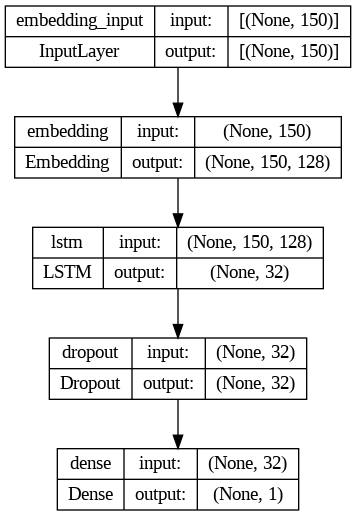

In [ ]:
plot_model(model, to_file='/content/drive/My Drive/20/model_datasetskripsi.png', show_shapes=True, show_layer_names=True)


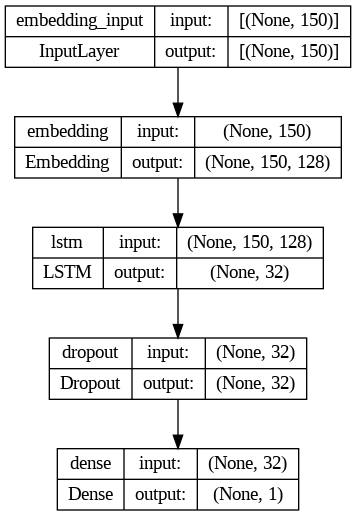

In [ ]:
from IPython.display import Image
Image('/content/drive/My Drive/model_plot.png')

In [ ]:
history = model.fit(X_train, y_train, validation_data=[X_test, y_test],
          batch_size=128, epochs=20, verbose=1)

Epoch 1/20
4905/4905 [==============================] - 979s 199ms/step - loss: 0.1309 - accuracy: 0.9589 - val_loss: 0.0893 - val_accuracy: 0.9733
Epoch 2/20
4905/4905 [==============================] - 966s 197ms/step - loss: 0.0816 - accuracy: 0.9776 - val_loss: 0.0690 - val_accuracy: 0.9808
Epoch 3/20
4905/4905 [==============================] - 969s 197ms/step - loss: 0.0650 - accuracy: 0.9825 - val_loss: 0.0566 - val_accuracy: 0.9838
Epoch 4/20
4905/4905 [==============================] - 951s 194ms/step - loss: 0.0567 - accuracy: 0.9843 - val_loss: 0.0521 - val_accuracy: 0.9847
Epoch 5/20
4905/4905 [==============================] - 952s 194ms/step - loss: 0.0530 - accuracy: 0.9851 - val_loss: 0.0472 - val_accuracy: 0.9861
Epoch 6/20
4905/4905 [==============================] - 965s 197ms/step - loss: 0.0498 - accuracy: 0.9859 - val_loss: 0.0450 - val_accuracy: 0.9868
Epoch 7/20
4905/4905 [==============================] - 960s 196ms/step - loss: 0.0462 - accuracy: 0.9869 - val_

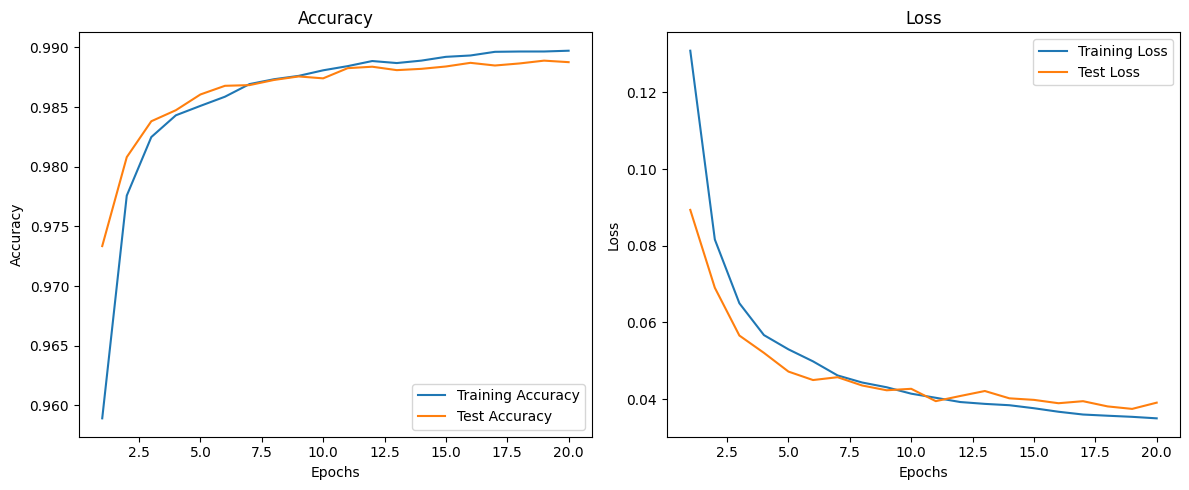

In [ ]:
import matplotlib.pyplot as plt
# Learning curve
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
test_loss = history.history['val_loss']
epochs = range(1, len(train_accuracy) + 1)

# Plotting learning curve
plt.figure(figsize=(12, 5))

# Plotting accuracy curve
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, test_accuracy, label='Test Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss curve
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, test_loss, label='Test Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

4905/4905 [==============================] - 113s 23ms/step - loss: 0.0391 - accuracy: 0.9888
Test Loss: 0.03906839340925217
Test Accuracy: 0.9887609481811523
4905/4905 [==============================] - 94s 19ms/step


In [ ]:
from keras.models import model_from_json
import numpy as np

model_json = model.to_json()
with open("modeldatasetskripsi.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model_weightsdatasets.h5")

In [ ]:
train_file_path = '/content/drive/My Drive/20/train_data_skripsi.csv'
test_file_path = '/content/drive/My Drive/20/test_data_skripsi.csv'

df_train = pd.DataFrame({'url': df.iloc[train_idx].url, 'status': y_train})
df_test = pd.DataFrame({'url': df.iloc[test_idx].url, 'status': y_test, 'predicted_status': y_pred_classes.flatten()})

df_train.to_csv(train_file_path, index=False)
df_test.to_csv(test_file_path, index=False)

print(f'Training data with predictions saved to {train_file_path}')
print(f'Testing data with predictions saved to {test_file_path}')

Training data with predictions saved to /content/drive/My Drive/20/train_data_skripsi.csv
Testing data with predictions saved to /content/drive/My Drive/20/test_data_skripsi.csv


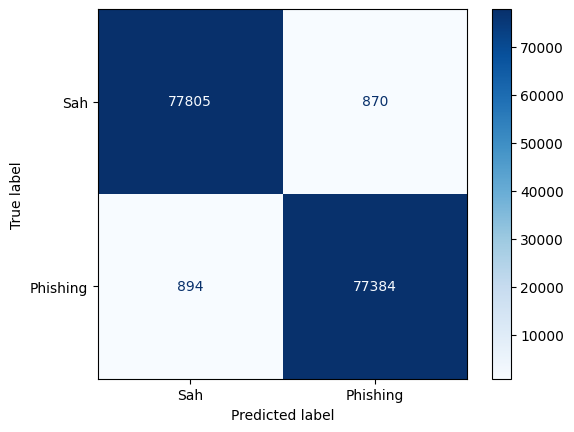

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Sah', 'Phishing'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

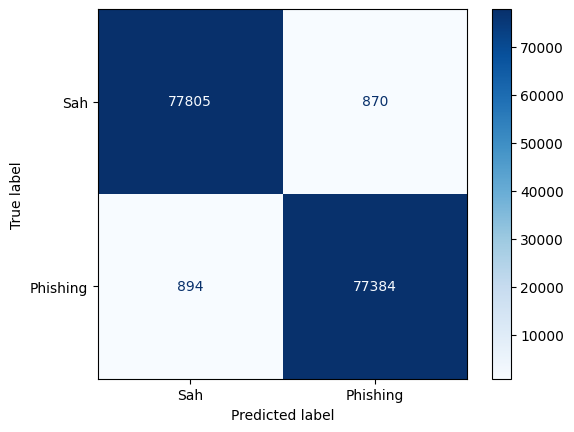

Precision Sah: 0.988640262265086
Recall Sah: 0.9889418493803622
Precision Phishing: 0.9888823574513763
Recall Phishing: 0.9885791665602085


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score

cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Sah', 'Phishing'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Hitung precision dan recall
precision_sah = precision_score(y_test, y_pred_classes, pos_label=0)
recall_sah = recall_score(y_test, y_pred_classes, pos_label=0)
# Hitung precision dan recall
precision_phishing = precision_score(y_test, y_pred_classes, pos_label=1)
recall_phishing = recall_score(y_test, y_pred_classes, pos_label=1)
print(f'Precision Sah: {precision_sah}')
print(f'Recall Sah: {recall_sah}')
print(f'Precision Phishing: {precision_phishing}')
print(f'Recall Phishing: {recall_phishing}')

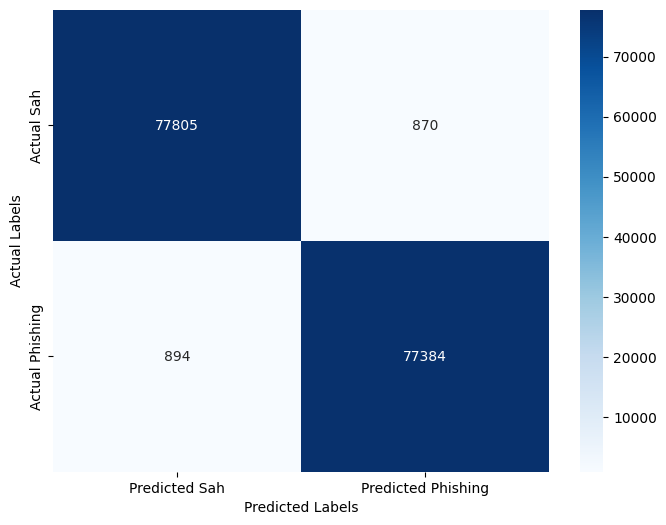

Precision Sah: 0.988640262265086
Recall Sah: 0.9889418493803622
Precision Phishing: 0.9888823574513763
Recall Phishing: 0.9885791665602085


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Sah', 'Predicted Phishing'], yticklabels=['Actual Sah', 'Actual Phishing'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

# Hitung precision dan recall
precision_sah = precision_score(y_test, y_pred_classes, pos_label=0)
recall_sah = recall_score(y_test, y_pred_classes, pos_label=0)

# Hitung precision dan recall
precision_phishing = precision_score(y_test, y_pred_classes, pos_label=1)
recall_phishing = recall_score(y_test, y_pred_classes, pos_label=1)

print(f'Precision Sah: {precision_sah}')
print(f'Recall Sah: {recall_sah}')
print(f'Precision Phishing: {precision_phishing}')
print(f'Recall Phishing: {recall_phishing}')


In [ ]:
target_proba = model.predict(X_test, batch_size=1)

156953/156953 [==============================] - 1444s 9ms/step


In [ ]:
target_proba[0:10]

array([[2.8112876e-05],
       [9.7005266e-01],
       [2.9247234e-05],
       [9.9998873e-01],
       [1.2116231e-05],
       [9.9828595e-01],
       [9.4475761e-02],
       [8.5990787e-06],
       [4.8461592e-05],
       [9.9744427e-01]], dtype=float32)

In [ ]:
l_layers = model.layers
weights = l_layers[1].get_weights()
weights[0].shape

(128, 128)

In [ ]:
def url_to_sequence(url, vocabulary, max_url_len):
    url_int_tokens = [[vocabulary.get(x, 0) for x in url if x in vocabulary]]
    return sequence.pad_sequences(url_int_tokens, maxlen=max_url_len)

url = input("Enter the URL to predict: ")
X_manual = url_to_sequence(url, vocabulary, max_url_len)
target_proba = model.predict(X_manual, batch_size=1)

def print_result(proba):
    if proba > 0.5:
        return "phishing"
    else:
        return "sah"

print("Test URL:", url, "is", print_result(target_proba[0]))

Enter the URL to predict: http://211.95.3.83/Chase/page/confirm.php
1/1 [==============================] - 0s 53ms/step
Test URL: http://211.95.3.83/Chase/page/confirm.php is phishing


In [ ]:
def url_to_sequence(url, vocabulary, max_url_len):
    url_int_tokens = [[vocabulary.get(x, 0) for x in url if x in vocabulary]]
    return sequence.pad_sequences(url_int_tokens, maxlen=max_url_len)

url = input("Enter the URL to predict: ")
X_manual = url_to_sequence(url, vocabulary, max_url_len)
target_proba = model.predict(X_manual, batch_size=1)

def print_result(proba):
    if proba > 0.5:
        return "phishing"
    else:
        return "sah"

print("Test URL:", url, "is", print_result(target_proba[0]))

Enter the URL to predict: https://www.kaggle.com/
1/1 [==============================] - 0s 37ms/step
Test URL: https://www.kaggle.com/ is sah


In [ ]:
from google.colab import drive
from tensorflow.keras.models import model_from_json
import numpy as np

drive.mount('/content/drive')
model_json = model.to_json()
with open("/content/drive/My Drive/20/modeldatasetskripsi.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("/content/drive/My Drive/20/model_weightssdatasets.h5")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
model.save("/kaggle/working/model_datasets.h5")
load_model = tf.keras.models.load_model("/kaggle/working/model_datasets.h5")